In [2]:
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt

## Some terminology

User looking for recommendation: **Main user** <br/>
Other users: **Other users/ users**

## Finding relations between users 

We will generate relationships (weights) between the main user and other users. The suggestions/ratings of a user having a better relationship with main user will have more weightage over that of other users. <br />
The relationship will be denotated by a directed edge from the main user to the other user.

In [3]:
data = pd.read_csv('rating_complete.csv')
data = data[:1000]
data['anime_id'] = 'a' + data['anime_id'].astype(int).astype(str)

In [4]:
data.head()

,user_id,anime_id,rating
0,0,a430,9
1,0,a1004,5
2,0,a3010,7
3,0,a570,7
4,0,a2762,9


In [5]:
G = nx.from_pandas_edgelist(data, 'user_id', 'anime_id', edge_attr='rating')

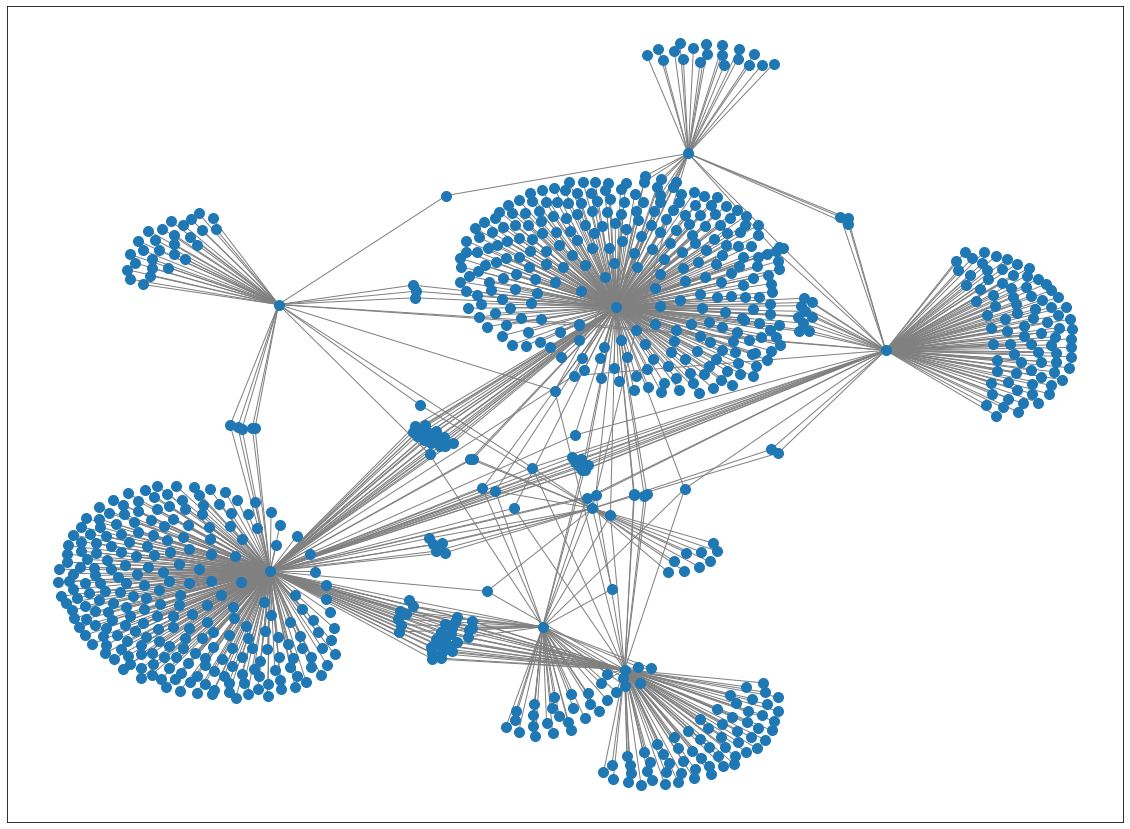

In [6]:
plt.figure(figsize=(20, 15))
weights_labels = nx.get_edge_attributes(G, 'rating')
pos=nx.spring_layout(G)

nx.draw_networkx(G, node_size=100, pos=pos, with_labels=False, edge_color='grey')

# Uncomment below to see edge weights
# nx.draw_networkx_edge_labels(G, pos, edge_labels=weights_labels)

In [7]:
data.groupby(by='user_id').count()

,anime_id,rating
user_id,,
0,35,35
1,103,103
2,51,51
3,315,315
4,118,118
5,43,43
6,311,311
7,24,24


In [8]:
data.groupby(by='anime_id').count()

,user_id,rating
anime_id,,
a1,2,2
a100,1,1
a10030,1,1
a1004,2,2
a10067,1,1
...,...,...
a9919,2,2
a9926,1,1
a9941,1,1


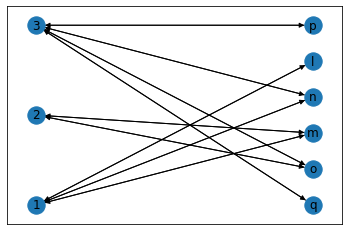

2
{(2, 1): 0.25, (2, 2): 0.5, (2, 3): 0.25}


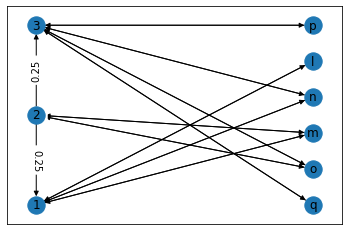

In [82]:
# creating weighted edges bw user who needs recommendation (u) and 
# remianing users (w)

G = nx.Graph()

users = [1,2,3]
anime = ['l', 'm','n','o' ,'p','q']

G.add_nodes_from(users, label='user')
G.add_nodes_from(anime, label='anime')
G.add_edges_from([(1, 'l', {'rating' : 5}), 
                  (1, 'm', {'rating' : 5}),
                  (1, 'n', {'rating' : 5}),
                  (2, 'm', {'rating' : 5}),
                  (2, 'o', {'rating' : 5}),
                  (3, 'n', {'rating' : 5}),
                  (3, 'o', {'rating' : 5}),
                  (3, 'p', {'rating' : 5}),
                  (3, 'q', {'rating' : 5})])

G = nx.DiGraph(G)

pos = nx.bipartite_layout(G, users)

nx.draw_networkx(G, pos=pos)
plt.show()

def relationship_among_users(G, user):
    '''
        description:
            given a user, add weighted edges between 
            given user and other users based on common nodes
    
        parameters:
            G: the bipartite graph (directed, weighted)
            user: user who is looking for recommendations

        returns: 
            void
    '''

    u = user
    deg = G.out_degree(u)
    print(deg)

    for w in users:
        weight = 0.0
        for v in G.neighbors(u): 
            if G.nodes[v]['label'] == 'anime' and G.has_edge(w, v):
                weight += (1/G.out_degree(v))

        weight /= deg

        if (weight != 0):
            G.add_edge(u, w, weight=weight) 

relationship_among_users(G, 2)
edge_weights = nx.get_edge_attributes(G, 'weight')
print(edge_weights)
nx.draw_networkx(G, pos=pos)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_weights)
plt.show()

In [87]:
def recommendation_list(G, u, include_already_watched=False):
    '''
        description: 
            Given a graph with connections (weghted, directed) among users
            and the user who needs recommendations,
            returns sorted list of recommended animes 

        parameters:
            G: Graphs with connection among users 
                (graph after implementing 'relationship_among_users()')
            u: User who is looking for recommendations

        returns: 
            sorted list of recommended anime
                eg. [(anime1, score1), (anime2, score2), (anime3, score3)]
    '''

    possible_anime = set()

    for n in G.neighbors(u):
        if G.nodes[n]['label'] == 'anime':
            for other_users in G.neighbors(n):
                for anime in G.neighbors(other_users):
                    if G.nodes[anime]['label'] == 'anime':
                        possible_anime.add(anime)

    print(possible_anime)
    suggestion_list = {}

    for anime in possible_anime:
        score = 0
        for w in G.neighbors(anime):
            score += (G[u][w]['weight'] * G[w][anime]['rating'] / (deg if w==u else G.out_degree(w)))
        suggestion_list[anime] = score

    return (sorted(list(suggestion_list.items()), key=(lambda x : x[1]), reverse=True))

recommendation_list(G, 2)

{'q', 'o', 'm', 'n', 'l', 'p'}


[('m', 1.6666666666666667),
 ('o', 1.5625),
 ('n', 0.7291666666666667),
 ('l', 0.4166666666666667),
 ('q', 0.3125),
 ('p', 0.3125)]